# Perkenalan

Final Project 1- Kampus Merdeka Batch 3 (Hacktiv8)

Nama Anggota: Alifina Aulia A dan Wanwha Sonia Putri A.S

Dataset yang digunakan adalah Dataset yang diperoleh dari Kaggle yaitu "Uber and Lyft Dataset Boston, MA". Dataset tersebut memuat data perjalanan taksi Uber dan Lyft di Boston, MA. Dataset terdiri dari 693.071 observasi dan 57 fitur.

Tujuan dari project ini adalah untuk memprediksi harga perjalanan menggunakan taksi Uber dan Lyft.

Oleh karena itu, kami memilih target berupa "price" yang dianalisis berdasarkan 10 feature yang paling sesuai.

# Import Pustaka

In [58]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score

# Data Loading

In [2]:
#membaca data
df= pd.read_csv("rideshare_kaggle.csv")

In [3]:
#mengetahui dimensi data
df.shape

(693071, 57)

In [4]:
#melihat 5 data teratas
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
#mengetahui keberadaan missing value dan tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Berdasarkan proses tersebut diperoleh informasi yaitu data terdiri dari 693071 baris dan 57 kolom. Terdapat 29 kolom bertipe float, 17 kolom bertipe integer, dan 11 kolom bertipe object. Kolom price memiliki 637976 baris yang tidak nul dari 693071 total baris keseluruhan. Artinya terdapat missing value yang harus dibersihkan sebelum mengolah data lebih lanjut. 

Berdasarkan tujuan yaitu menentukan harga perjalanan, maka kita memerlukan informasi terkait penyedia layanan perjalanan. Informasi tersebut dapat kita ketahui melalui kolom cab_type.

In [6]:
df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

Jadi ada dua penyedia layanan perjalanan yaitu Uber dan Lyft. Dataset merekam 385663 perjalanan menggunakan Uber dan 307408 perjalanan menggunakan Lyft.

# Cleaning Data

## Handling null values

In [7]:
#melihat jumlah nul value pada setiap kolom
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Kolom price memiliki nilai null sebanyak 55095. Ada beberapa cara untuk mengganti nilai nul yaitu salah satunya dengan mengisinya menggunakan nilai mean.

In [8]:
mean= df['price'].mean()
mean

16.545125490614065

Mean dari kolom price pada data tersebut adalah 16.545 sehingga kita akan mengisi baris kosong kolom price dengan nilai 16.545

In [9]:
df['price'].fillna(mean, inplace=True)

In [10]:
df.isnull().any()

id                             False
timestamp                      False
hour                           False
day                            False
month                          False
datetime                       False
timezone                       False
source                         False
destination                    False
cab_type                       False
product_id                     False
name                           False
price                          False
distance                       False
surge_multiplier               False
latitude                       False
longitude                      False
temperature                    False
apparentTemperature            False
short_summary                  False
long_summary                   False
precipIntensity                False
precipProbability              False
humidity                       False
windSpeed                      False
windGust                       False
windGustTime                   False
v

In [11]:
#mengetahui nilai mean kolom price yang telah diperbaiki
mean= df['price'].mean()
mean

16.545125490610985

Mengisi baris kosong pada kolom price mengguankan nilai mean sebesar 16.545 tidak merubah nilai mean kolom price pada dataset

## Handling duplicated values

In [12]:
#mengetahui jumlah duplicated values
df.duplicated().sum()

0

Karena duplicated values=0 maka berarti tidak ada duplicated value pada dataset. Selanjutnya kita ingin mengetahui macam-macam product yang dimiliki Uber dan Lyft. Kita dapat memperoleh informasi tersebut dari kolom name.

In [13]:
#mengetahui nama product yang disediakan Uber dan Lyft
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [14]:
df['name'] = df['name'].str.replace('Black SUV', 'BlackSUV')
df['name'] = df['name'].str.replace('Lyft Black XL', 'LyftBlackXL')
df['name'] = df['name'].str.replace('Lyft XL', 'LyftXL')
df['name'] = df['name'].str.replace('Lux Black XL', 'LuxBlackXL')
df['name'] = df['name'].str.replace('Lux Black', 'LuxBlack')

In [15]:
#memastikan bahwa pengeditan telah berhasil
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'LuxBlackXL', 'LyftXL', 'LuxBlack',
       'UberXL', 'Black', 'UberX', 'WAV', 'BlackSUV', 'UberPool', 'Taxi'],
      dtype=object)

Jadi nama-nama product yang tersedia dari kedua penyedia layanan perjalanan adalah 'Shared', 'Lux', 'Lyft', 'LuxBlackXL', 'LyftXL', 'LuxBlack',
       'UberXL', 'Black', 'UberX', 'WAV', 'BlackSUV', 'UberPool', 'Taxi'

# EDA (Exploratory Data Analysis)

In [16]:
#menampilkan bentuk data yang akan dianalisis
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Karena tujuan kita adalah memprediksi harga perjalanan (target=price) maka perlu dilakukan analisis terhadap :
1. Harga perjalanan (perbandingan Uber dan Lyft)
2. Pengaruh data numerik terhadap harga perjalanan
3. Pengaruh data kategori [ordinal] terhadap harga perjalanan

## Measure of Central Tendency

In [17]:
#mengetahui rata-rata harga pemesanan taksi
df['price'].mean()

16.545125490610985

In [18]:
#mengetahui median/ nilai tengah kolom price
df['price'].median()

16.0

In [19]:
#mengetahui produk apa yang paling sering digunakan (Lyft/Uber)
df['cab_type'].mode()

0    Uber
Name: cab_type, dtype: object

## Measure of Spread/ Dispersion (Variability)

In [20]:
#mengetahui ukuran penyebaran data melalui standar deviasi
std_price=df['price'].std(ddof=1)
std_timestamp=df['timestamp'].std(ddof=1)
print("deviasi standar harga taksi :", std_price, "USD")
print("deviasi standar durasi perjalanan :", std_timestamp, "detik")

deviasi standar harga taksi : 8.946069063710608 USD
deviasi standar durasi perjalanan : 689192.4925855101 detik


In [21]:
#mengetahui ukuran penyebaran data melalui skewnes
df['price'].skew()

1.0899667817227607

## Measure of Correlation dan Penerapanya

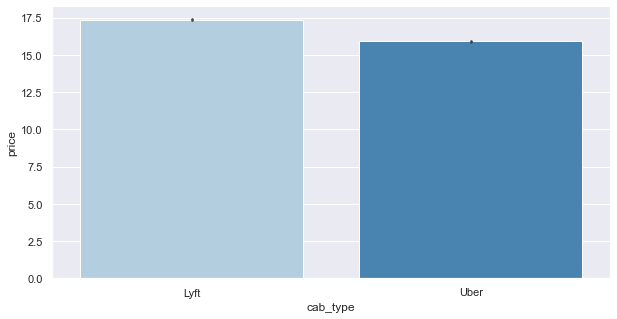

In [22]:
#Perbandingan harga perjalanan menggunakan Uber dan Lyft
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='cab_type', y='price', data=df, palette='Blues');

In [23]:
df.groupby('cab_type')['price'].mean()

cab_type
Lyft    17.351396
Uber    15.902455
Name: price, dtype: float64

Berdasarkan barplot dan informasi diatas diketahui bahwa Lyft memiliki harga rata-rata lebih tiggi dari Uber

Selanjutnya kita akan melihat perbandingan jumlah pengguna layanan Lyft dan Uber

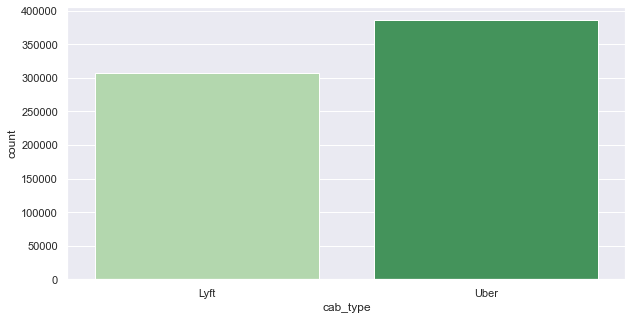

In [24]:
#Perbandingan jumlah pengguna layanan Lyft dan Uber
sns.countplot(x='cab_type', data=df, palette='Greens');

Melalui countplot tersebut, diperoleh bahwa pengguna Uber lebih banyak daripada pengguna Lyft. Uber dan Lyft masing-masing memiliki jenis taksi yang berbeda. Oleh karena itu, untuk selanjutnya akan dianalisis terkait hubungan antara tarif perjalanan dengan jenis taksi yang dimiliki Uber maupun Lyft.

<AxesSubplot:xlabel='price', ylabel='name'>

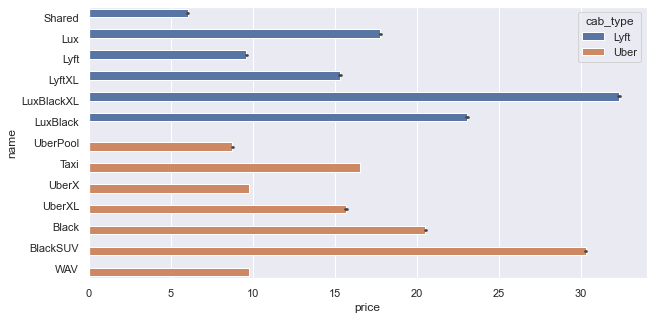

In [25]:
#Cek pengaruh jenis taksi Uber dan Lyft terhadap tarif perjalanan
df.sort_values('cab_type', inplace=True)
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(y='name', x='price', data=df, hue='cab_type')

In [26]:
df.groupby('name')['price'].mean()

name
Black         20.523786
BlackSUV      30.286763
Lux           17.771240
LuxBlack      23.062468
LuxBlackXL    32.324086
Lyft           9.610885
LyftXL        15.309363
Shared         6.029893
Taxi          16.545125
UberPool       8.752500
UberX          9.765074
UberXL        15.678144
WAV            9.765019
Name: price, dtype: float64

Taksi Lyft yang memiliki rata-rata harga paling mahal adalah LuxBlackXL yaitu 32.324086. Sedangkan, Shared adalah jenis taksi Lyft yang memeiliki rata-rata harga paling murah sebesar 6.029893

Taksi Uber yang memiliki rata-rata harga paling mahal adalah BlackSUV sebesar 30.286763. Sedangkan, UberPool adalah jenis taksi Uber yang memeiliki rata-rata harga paling murah sebesar 8.752500

Jadi jenis taksi yang dipilih pelanggan mempengaruhi harga perjalanan mereka. 

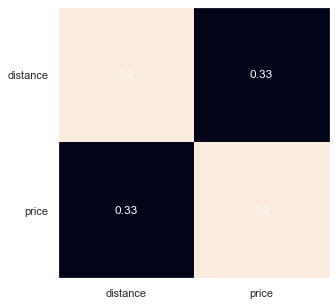

In [27]:
#Korelasi jarak dengan tarif perjalana
matrix= np.corrcoef(df['distance'], df['price']).round(decimals=3)
fig, ax= plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('distance', 'price'))
ax.yaxis.set(ticks=(0,1), ticklabels=('distance', 'price'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i,j], ha='center', va='center', color='w')
plt.show()

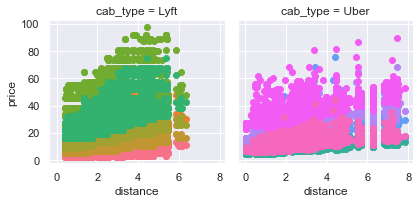

In [28]:
g= sns.FacetGrid(df, col='cab_type', hue='name')
g.map(plt.scatter, 'distance', 'price')
plt.show()

Setiap warna pada grafik tersebut mempresentasikan jenis taksi yang dimiliki oleh Uber dan Lyft. Terlihat bahwa tarif perjananan taksi yang dimiliki Lyft lebih besar dari pada Uber meskipun jarak yang ditempuh tidak jauh berbeda.
Dari grafik tersebut juga terlihat bahwa jenis taksi mempengaruhi harga. 
Korelasi antara jarak dan perjalanan memiliki koefisien korelasi sebesar 0,33.
Artinya korelasi jarak dan tarif perjalanan dapat dikategorikan cukup berkorelasi.

In [29]:
#Harga perjalanan termahal dan termurah
destination_price = df.pivot_table(values='price',
                       index=['name'],
                       columns=['source','destination'],
                       aggfunc=np.mean,
                       fill_value=0)
destination_price.loc['mean'] = destination_price.mean()
destination_price = destination_price.T
destination_price = destination_price.reset_index(drop=False)
destination_price.sort_values('mean', ascending=False, inplace=True)
destination_price.head()

name,source,destination,Black,BlackSUV,Lux,LuxBlack,LuxBlackXL,Lyft,LyftXL,Shared,Taxi,UberPool,UberX,UberXL,WAV,mean
24,Financial District,Boston University,34.228923,43.572633,28.366481,37.477747,46.765647,14.248957,24.299722,9.324757,16.545125,13.400130,14.824903,25.151751,14.824903,24.848591
14,Boston University,Financial District,30.576524,41.471466,27.541029,35.169680,45.013213,14.180111,23.776078,8.689152,16.545125,10.752918,14.863813,23.495460,14.863813,23.610645
20,Fenway,Financial District,28.707843,39.377124,27.272538,34.741331,44.819695,14.200416,23.588766,8.412621,16.545125,11.203268,13.479085,22.697386,13.479085,22.963406
25,Financial District,Fenway,30.640808,39.692960,26.540915,33.971567,43.753814,13.888350,23.061026,8.623440,16.545125,11.225554,13.560626,22.902868,13.560626,22.920591
50,Northeastern University,Financial District,28.238158,38.856579,25.400556,32.973574,42.012517,13.739221,22.513908,8.190542,16.545125,10.926316,13.248026,22.141447,13.248026,22.156461


In [30]:
destination_price.tail()

name,source,destination,Black,BlackSUV,Lux,LuxBlack,LuxBlackXL,Lyft,LyftXL,Shared,Taxi,UberPool,UberX,UberXL,WAV,mean
44,North Station,Haymarket Square,15.675427,26.900788,11.389430,16.716968,27.111961,7.054242,10.425591,4.125174,16.545125,6.455979,7.286465,10.509855,7.286465,12.883344
35,Haymarket Square,West End,15.616120,26.887295,10.821429,16.620536,26.957589,7.069196,9.625744,4.045387,16.545125,6.508880,7.831967,10.538934,7.831967,12.838475
56,South Station,Financial District,15.633252,26.883252,11.041505,16.956550,27.517510,7.170558,9.756161,4.113489,16.545125,5.363081,7.224939,10.468826,7.224939,12.761476
29,Financial District,South Station,15.630196,26.878973,10.949416,16.849546,27.361219,7.114786,9.246433,4.075227,16.545125,6.089242,7.183985,9.712103,7.183985,12.678480
33,Haymarket Square,North Station,15.613158,26.877632,10.797636,16.604312,26.926287,7.018081,9.166898,4.068150,16.545125,6.789474,7.171711,9.817105,7.171711,12.659021


Berdasarkan tabel tersebut, perjalanan dengan harga rata-rata termahal adalah dari Financial District ke Boston University sebesar 24.61. Taksi termahal untuk perjalanan ini adalah Lux BlackXL milik Lyft dengan harga 46.77 USD dan produk termurahnya adalah Shared milik Lyft dengan harga 9.32 USD.

Perjalanan dengan harga rata-rata termurah adalah dari Haymarket Square ke North Station sebesar 12.42 USD. Produk termahal untuk perjalanan ini adalah LuxBlackXL milik Lyft dengan harga 26.92 dan produk termurahnya adalah Shared milik Lyft dengan harga 4.07.

In [31]:
#Pengaruh cuaca dan lonjakan jumlah pesanan terhadap harga
short_surge = df.pivot_table(values='price',
                       index=['surge_multiplier'],
                       columns=['cab_type', 'short_summary'],
                       aggfunc=np.mean,
                       fill_value=0)
short_surge.loc['mean'] = short_surge.mean()
short_surge = short_surge.T
short_surge = short_surge.reset_index(drop=False)

short_surge.sort_values('mean', ascending=False, inplace=True)
short_surge

surge_multiplier,cab_type,short_summary,1.0,1.25,1.5,1.75,2.0,2.5,3.0,mean
8,Lyft,Rain,16.581970,23.615183,27.435897,36.976190,39.547619,25.500000,65.000000,33.522409
6,Lyft,Partly Cloudy,16.622169,24.095661,28.335751,33.038540,39.012262,29.666667,62.500000,33.324436
4,Lyft,Mostly Cloudy,16.593640,23.724283,29.009285,33.342241,39.313910,30.583333,37.750000,30.045242
3,Lyft,Light Rain,16.589515,23.796782,28.779948,32.702247,40.134831,33.361111,32.833333,29.742538
5,Lyft,Overcast,16.574693,23.750371,29.377551,34.279861,38.325532,26.912500,35.666667,29.269596
0,Lyft,Clear,16.519477,23.563738,28.963102,33.220085,40.725490,33.750000,0.000000,25.248842
7,Lyft,Possible Drizzle,16.539725,23.008361,26.988372,35.623188,36.697917,37.750000,0.000000,25.229652
2,Lyft,Foggy,16.682484,24.005650,30.913333,33.087500,29.595238,22.500000,0.000000,22.397744
1,Lyft,Drizzle,16.689300,24.076190,28.436170,31.840909,36.684211,18.000000,0.000000,22.246683
12,Uber,Light Rain,15.943439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.277634


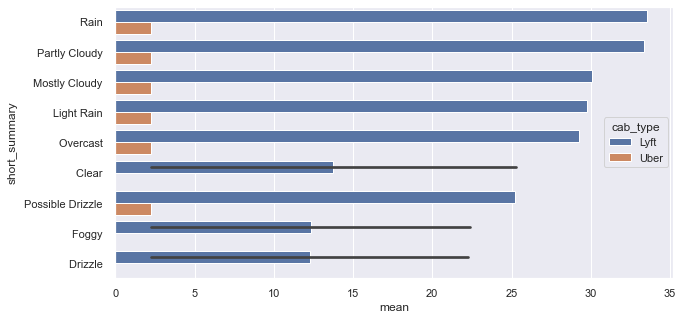

In [32]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='mean', y='short_summary', hue= df.cab_type, data=short_surge);

Cuaca dan jumlah lonjakan pemesanan memengaruhi harga layanan taksi Lyft. Rain membuat jumlah pesanan taksi Lyft meningkat signifikan yaitu 3.0 dengan tarif perjalanannya 65.00.Peningkatan pemesanan taksi uber paling tinggi sebesar 1.0 dengan tarif perjalanan paling mahal sebesar 15.51 

### Correlation Analysis

Sesuai dengan tujuan yaitu memprediksi harga perjalanan maka ada beberapa variabel independen yang memengaruhinya yaitu 
* hour
* day
* month
* source
* destination
* cab_type
* name
* distance
* surge_multiplier
* latitude
* longitude
* temperature
* short_summary
* humidity
* visibility
* price

In [33]:
new_column = ["cab_type","name","hour","day","month","source","destination","price","distance","short_summary","temperature","visibility","windSpeed","surge_multiplier", "price"]
df_new= df[new_column]
df_new.head()

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,visibility,windSpeed,surge_multiplier,price
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,8.66,1.0,5.0
543594,Lyft,Lux,11,17,12,Back Bay,North End,22.5,2.98,Overcast,34.87,8.275,7.37,1.0,22.5
543596,Lyft,Lyft,11,17,12,Haymarket Square,Financial District,7.0,1.01,Overcast,34.87,8.275,7.37,1.0,7.0
543597,Lyft,Lux,11,17,12,Haymarket Square,Financial District,11.0,1.01,Overcast,34.87,8.275,7.37,1.0,11.0
543598,Lyft,LyftXL,14,14,12,Haymarket Square,Financial District,11.0,1.01,Clear,36.08,9.832,3.02,1.0,11.0


Sekarang mari kita coba cek dari semua atribut milik df_new, mana yang memiliki korelasi tertinggi. Atribut-atribut dengan korelasi tertinggi lah yang akan kita pilih untuk modelling nantinya.

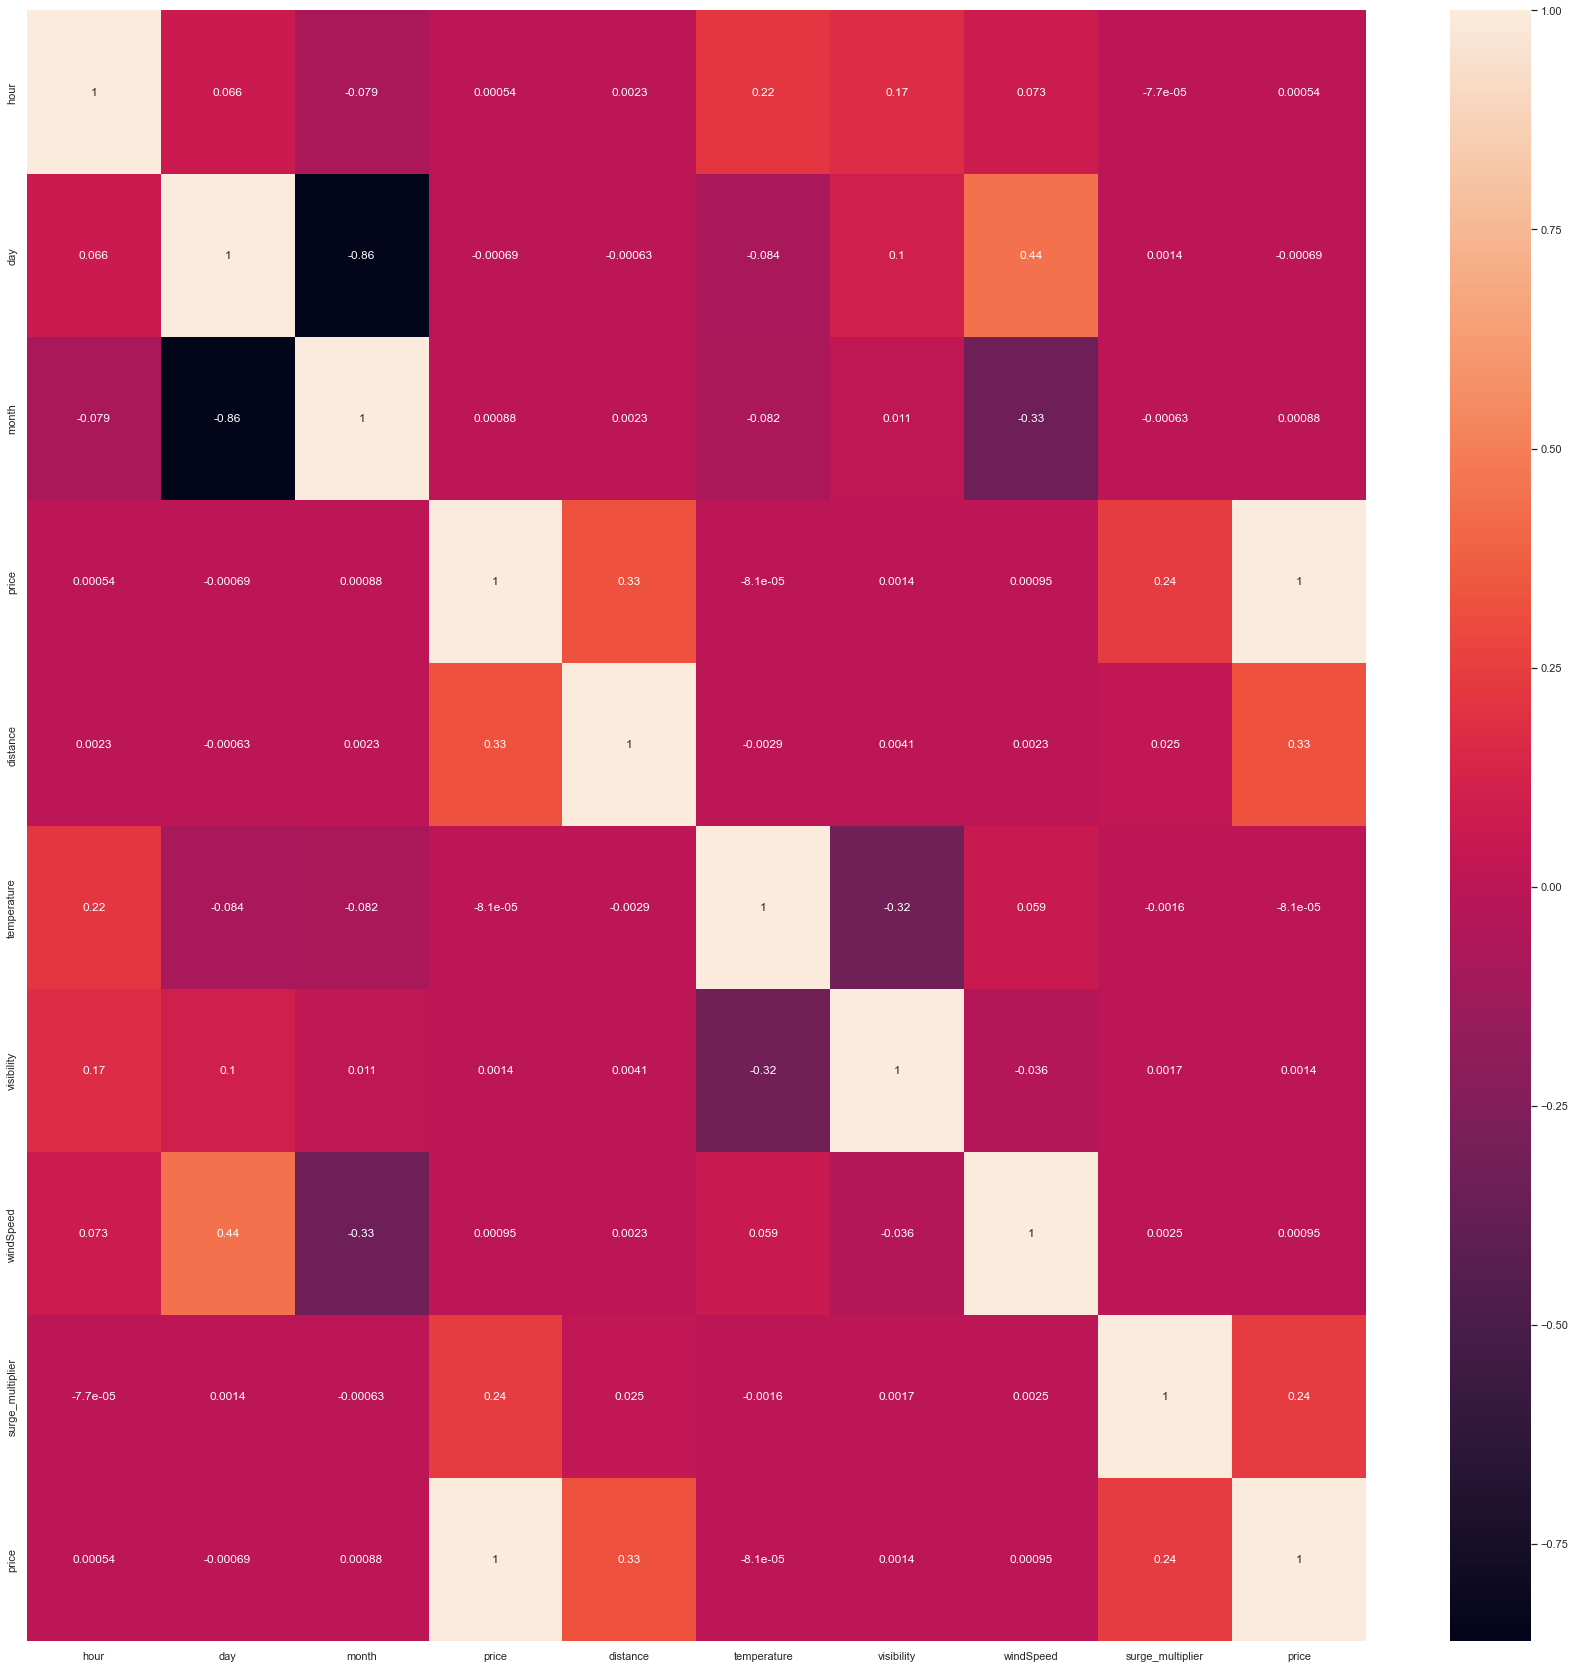

In [34]:
plt.figure(figsize=(30,30))
sns.heatmap(df_new.corr(),annot=True);

## Data Modeling

### Encoding

In [35]:
df2 = df[["cab_type","name","hour","day","month","source","destination","price","distance","short_summary","temperature","visibility","windSpeed","surge_multiplier"]]
df2

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,visibility,windSpeed,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,8.66,1.0
543594,Lyft,Lux,11,17,12,Back Bay,North End,22.5,2.98,Overcast,34.87,8.275,7.37,1.0
543596,Lyft,Lyft,11,17,12,Haymarket Square,Financial District,7.0,1.01,Overcast,34.87,8.275,7.37,1.0
543597,Lyft,Lux,11,17,12,Haymarket Square,Financial District,11.0,1.01,Overcast,34.87,8.275,7.37,1.0
543598,Lyft,LyftXL,14,14,12,Haymarket Square,Financial District,11.0,1.01,Clear,36.08,9.832,3.02,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297546,Uber,UberPool,6,26,11,Back Bay,North End,10.0,3.16,Overcast,41.83,5.589,1.83,1.0
297545,Uber,UberX,6,26,11,West End,South Station,7.0,1.26,Overcast,41.83,5.589,1.83,1.0
297544,Uber,BlackSUV,6,26,11,West End,South Station,27.5,1.26,Overcast,41.83,5.589,1.83,1.0
297470,Uber,WAV,4,29,11,Northeastern University,Back Bay,8.5,1.64,Mostly Cloudy,38.18,10.000,8.52,1.0


In [36]:
#Melakukan encoding dengan Label Encoder pada atribut yang memiliki tipe data Object.
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns =["cab_type","name","hour","day","month","source","destination",
                                                   "price","distance","short_summary","windSpeed","temperature","visibility","surge_multiplier"]))
])

#Membuat variabel df_rfe untuk menampung hasil encode
df_enc = encoding_pipeline.fit_transform(df2)
df_enc

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,visibility,windSpeed,surge_multiplier
0,0,7,9,9,1,5,7,4,15,4,205,226,231,0
543594,0,2,11,10,1,0,6,47,269,5,72,82,199,0
543596,0,5,11,10,1,5,4,8,72,5,72,82,199,0
543597,0,2,11,10,1,5,4,20,72,5,72,82,199,0
543598,0,6,14,7,1,5,4,20,72,0,83,146,63,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297546,1,9,6,12,0,0,6,17,287,5,190,63,13,0
297545,1,10,6,12,0,11,9,8,97,5,190,63,13,0
297544,1,1,6,12,0,11,9,57,97,5,190,63,13,0
297470,1,12,4,15,0,8,0,13,135,4,111,226,229,0


In [37]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693071 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   cab_type          693071 non-null  int64
 1   name              693071 non-null  int64
 2   hour              693071 non-null  int64
 3   day               693071 non-null  int64
 4   month             693071 non-null  int64
 5   source            693071 non-null  int64
 6   destination       693071 non-null  int64
 7   price             693071 non-null  int64
 8   distance          693071 non-null  int64
 9   short_summary     693071 non-null  int64
 10  temperature       693071 non-null  int64
 11  visibility        693071 non-null  int64
 12  windSpeed         693071 non-null  int64
 13  surge_multiplier  693071 non-null  int64
dtypes: int64(14)
memory usage: 79.3 MB


In [38]:
x = df_enc.drop(["price"], axis=1)
x.shape

(693071, 13)

In [39]:
y = df_enc['price']
y.shape

(693071,)

### Feature Selection

In [40]:
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

               Specs          Score
1               name  348094.164777
7           distance   88686.627998
12  surge_multiplier   38377.178322
0           cab_type    3948.927783
6        destination    1427.857933
5             source     403.036280
8      short_summary       1.103261
11         windSpeed       0.822406
10        visibility       0.700018
3                day       0.590517


Didapatkan 10 fitur terbaik untuk menjadi pembanding dari harga, yakni name, distance, surge_multiplier, cab_type, destination, source, short_summary, windSpeed, visibility dan day.

In [41]:
x_fit = df_enc[['name','distance','surge_multiplier','cab_type','destination',
               'source','visibility','windSpeed','short_summary','day']]
x_fit

,name,distance,surge_multiplier,cab_type,destination,source,visibility,windSpeed,short_summary,day
0,7,15,0,0,7,5,226,231,4,9
543594,2,269,0,0,6,0,82,199,5,10
543596,5,72,0,0,4,5,82,199,5,10
543597,2,72,0,0,4,5,82,199,5,10
543598,6,72,0,0,4,5,146,63,0,7
...,...,...,...,...,...,...,...,...,...,...
297546,9,287,0,1,6,0,63,13,5,12
297545,10,97,0,1,9,11,63,13,5,12
297544,1,97,0,1,9,11,63,13,5,12
297470,12,135,0,1,0,8,226,229,4,15


### Model Definition

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(x_fit, y, test_size=0.20)

### Linear Regression

In [43]:
X_test.shape

(138615, 10)

In [44]:
Y_test.shape

(138615,)

In [45]:
X_train.shape

(554456, 10)

In [46]:
Y_train.shape

(554456,)

In [47]:
lr = LinearRegression().fit(X_train,Y_train)

In [48]:
print('intercept: ', lr.intercept_)
print('slope: ', lr.coef_)

intercept:  35.45955299890635
slope:  [-3.44755738e+00  6.20550997e-02  1.14713358e+01  7.97719524e+00
  3.42729682e-02  7.42213291e-02 -5.95006184e-05 -1.90468412e-05
  9.51637100e-03 -5.73677051e-03]


Pada analisis regresi linear ini, didapatkan nilai intercept sekitar 35.46 yang berarti nilai respons yang diprediksi ketika fitur bernilai sama dengan 0. Peningkatan x_1 sebesar 1 menghasilkan kenaikan respons yang diprediksi sebesar -3.45, x_2 mengalami peningkatan sebesar 1 akan menghasilkan kenaikan respons yang diprediksi sebesar 6.20e-02, dan seterusnya.

In [49]:
y_pred = lr.predict(X_test)
y_pred

array([23.62131119, 29.05641197, 36.52889372, ..., 65.83513746,
       41.52510241, 20.8695563 ])

In [50]:
y_pred.shape

(138615,)

In [51]:
print('Linear Regression train R-squared : %.4f' % lr.score(X_train, Y_train))
print('Linear Regression test R-squared : %.4f' % lr.score(X_test, Y_test))

Linear Regression train R-squared : 0.5091
Linear Regression test R-squared : 0.5057


In [52]:
lr_mse = mean_squared_error(y_pred, Y_test)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression RMSE: 14.4449


### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt_model = dt.fit(X_train, Y_train)

y_pred2 = dt_model.predict(X_test)
l_dt_train_r2 = dt.score(X_train,Y_train)
l_dt_test_r2 = dt.score(X_test, Y_test)
print('Decision Tree train R squared : %.4f' % l_dt_train_r2)
print('Decision Tree test R squared": %.4f' % l_dt_test_r2)

Decision Tree train R squared : 0.9928
Decision Tree test R squared": 0.9420


In [54]:
dt_mse = mean_squared_error(y_pred2, Y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree Regressor RMSE: %.4f' % dt_rmse)

Decision Tree Regressor RMSE: 4.9478


## Kesimpulan Model

Dari analisis model yang telah dilakukan, diperoleh beberapa kesimpulan :

1. Terdapat 10 atribut/faktor yang mempengaruhi tarif taksi online, diantaranya yaitu name, distance, surge_multiplier, cab_type, destination, source, visibility, windSpeed, short_summary, dan day.
2. Metode yang paling tepat digunakan dalam pembuatan model adalah metode Decision Tree, karena tingkat akurasinya tertinggi daripada Regresi Linear. Tingkat akurasi pada Decision Tree mencapai 94.20% dengan Mean Squared Error yaitu 4.95, sedangkan tingkat akurasi pada Linear Regression mencapai 50.57% dengan Mean Squared Error sebesar 14.44

### Visualisasi Model

In [55]:
viz_data = df_enc[['name','distance','surge_multiplier','cab_type','destination',
               'source','visibility','windSpeed','short_summary','day','price']]
viz_data

,name,distance,surge_multiplier,cab_type,destination,source,visibility,windSpeed,short_summary,day,price
0,7,15,0,0,7,5,226,231,4,9,4
543594,2,269,0,0,6,0,82,199,5,10,47
543596,5,72,0,0,4,5,82,199,5,10,8
543597,2,72,0,0,4,5,82,199,5,10,20
543598,6,72,0,0,4,5,146,63,0,7,20
...,...,...,...,...,...,...,...,...,...,...,...
297546,9,287,0,1,6,0,63,13,5,12,17
297545,10,97,0,1,9,11,63,13,5,12,8
297544,1,97,0,1,9,11,63,13,5,12,57
297470,12,135,0,1,0,8,226,229,4,15,13


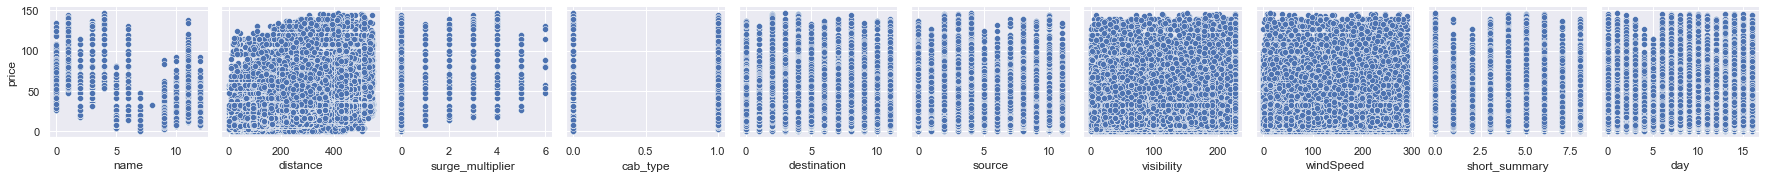

In [56]:
sns.pairplot(viz_data, 
             x_vars=['name','distance','surge_multiplier','cab_type','destination',
               'source','visibility','windSpeed','short_summary','day'],
             y_vars=['price'], kind='scatter')

In [59]:
pickle.dump(dt, open('model_fp1.pkl', 'wb'))